In [169]:
#importing required libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import os
import torch
from tqdm import tqdm
np.random.seed(42)

In [170]:
#Reading the csv file of dataset
df  = pd.read_csv('/Users/akashpatel/Tokyo.csv' )


In [171]:
# printing the dataset
df.head()

,Pid,Departure_time,Gender,Age,Occupation,Trip_type,Origin,Destination
0,264045,2008-10-01 09:00:00,2,10,9,1,11412,11414
1,268173,2008-10-01 10:42:00,2,15,14,4,12302,12303
2,277618,2008-10-01 13:35:00,2,5,14,8,13131,13110
3,277618,2008-10-01 15:02:00,2,5,14,4,13110,13110
4,264180,2008-10-01 12:45:00,1,14,15,4,12304,11421


In [172]:
#
df

,Pid,Departure_time,Gender,Age,Occupation,Trip_type,Origin,Destination
0,264045,2008-10-01 09:00:00,2,10,9,1,11412,11414
1,268173,2008-10-01 10:42:00,2,15,14,4,12302,12303
2,277618,2008-10-01 13:35:00,2,5,14,8,13131,13110
3,277618,2008-10-01 15:02:00,2,5,14,4,13110,13110
4,264180,2008-10-01 12:45:00,1,14,15,4,12304,11421
...,...,...,...,...,...,...,...,...
790608,377298,2008-10-01 07:00:00,2,7,7,1,60920,230
790609,371631,2008-10-01 05:40:00,2,14,4,1,60630,60622
790610,371631,2008-10-01 09:10:00,2,14,4,14,60622,60600
790611,373676,2008-10-01 07:10:00,1,12,4,1,60811,1211


In [173]:
# information about the dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790613 entries, 0 to 790612
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Pid             790613 non-null  int64 
 1   Departure_time  790613 non-null  object
 2   Gender          790613 non-null  int64 
 3   Age             790613 non-null  int64 
 4   Occupation      790613 non-null  int64 
 5   Trip_type       790613 non-null  int64 
 6   Origin          790613 non-null  int64 
 7   Destination     790613 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 48.3+ MB


,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination
count,790613.000000,790613.000000,790613.000000,790613.000000,790613.000000,790613.000000,790613.000000
mean,286422.961516,1.513932,8.395085,10.452158,4.663179,21159.079469,18984.366843
std,170333.821778,0.499806,3.891511,10.980001,5.754973,17367.967016,17570.281323
min,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000
25%,136649.000000,1.000000,6.000000,7.000000,1.000000,6311.000000,4111.000000
50%,286021.000000,2.000000,8.000000,9.000000,4.000000,13401.000000,11403.000000
75%,432782.000000,2.000000,12.000000,14.000000,7.000000,35120.000000,32151.000000
max,588568.000000,2.000000,17.000000,99.000000,99.000000,60931.000000,60931.000000


In [174]:
df['Trip_type'].nunique()

14

In [175]:
df['Pid'].nunique()

470140

In [176]:
# removing the departure time for feature reduction
df1 = df.loc[:, df.columns != 'Departure_time']
df1.head()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination
0,264045,2,10,9,1,11412,11414
1,268173,2,15,14,4,12302,12303
2,277618,2,5,14,8,13131,13110
3,277618,2,5,14,4,13110,13110
4,264180,1,14,15,4,12304,11421


In [177]:
# unique origin locations 
df['Origin'].nunique()

1651

In [178]:
# unique destination locations 
df['Destination'].nunique()

1652

In [179]:
df = df.loc[:, df.columns != 'Departure_time']
df.head()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination
0,264045,2,10,9,1,11412,11414
1,268173,2,15,14,4,12302,12303
2,277618,2,5,14,8,13131,13110
3,277618,2,5,14,4,13110,13110
4,264180,1,14,15,4,12304,11421


In [180]:
df = df.iloc[:, [0,1,2,3,5,6,4]]

In [181]:
X = df.iloc[:, 0:6]
y = df.iloc[:, 6:]

In [198]:
X

,Pid,Gender,Age,Occupation,Origin,Destination
0,264045,2,10,9,11412,11414
1,268173,2,15,14,12302,12303
2,277618,2,5,14,13131,13110
3,277618,2,5,14,13110,13110
4,264180,1,14,15,12304,11421
...,...,...,...,...,...,...
790608,377298,2,7,7,60920,230
790609,371631,2,14,4,60630,60622
790610,371631,2,14,4,60622,60600
790611,373676,1,12,4,60811,1211


In [183]:
y

,Trip_type
0,1
1,4
2,8
3,4
4,4
...,...
790608,1
790609,1
790610,14
790611,1


In [184]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
print(ohe.categories_)
 
y = ohe.transform(y)
print(y)

[array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 99])]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [188]:
y.shape

(790613, 14)

In [200]:
import torch
import torch.nn as nn

class Multiclass(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(Multiclass, self).__init__()
        self.fc1 = nn.Linear(in_channels, hidden_channels)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_channels, out_channels)

    def forward(self, X):
        X = self.fc1(X)
        X = self.relu(X)
        X = self.fc2(X)
        return X


In [213]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming you have input data X and target labels y
# Replace this with your actual data
#X = torch.randn((batch_size, 4 ))
#y = torch.randint(0, 3, (batch_size,))  # Assuming three classes (0, 1, 2)

X = torch.tensor((X), dtype=torch.float)
y = torch.tensor((y), dtype=torch.float)
#X = torch.tensor(X.values, dtype=torch.float32)
#y = torch.tensor(y.values, dtype=torch.float32)


print(batch_size)
print(X.shape)
print(y.shape)
# Instantiate your model
model = Multiclass(in_channels=6, hidden_channels=8, out_channels=14)

# Define the CrossEntropyLoss
loss_fn = nn.BCEWithLogitsLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000

losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    
    # Compute the loss
    loss = loss_fn(outputs, y)
    losses.append(loss.item())
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss during training
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

/var/folders/cm/gydxnn213wnfgk1p3pqs31x40000gn/T/ipykernel_51496/2697727248.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor((X), dtype=torch.float)
/var/folders/cm/gydxnn213wnfgk1p3pqs31x40000gn/T/ipykernel_51496/2697727248.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor((y), dtype=torch.float)


5
torch.Size([790613, 6])
torch.Size([790613, 14])
Epoch 1/1000, Loss: 11145.3955078125
Epoch 2/1000, Loss: 10881.97265625
Epoch 3/1000, Loss: 10622.3955078125
Epoch 4/1000, Loss: 10366.6474609375
Epoch 5/1000, Loss: 10113.8095703125
Epoch 6/1000, Loss: 9863.3154296875
Epoch 7/1000, Loss: 9615.0205078125
Epoch 8/1000, Loss: 9368.8134765625
Epoch 9/1000, Loss: 9124.58203125
Epoch 10/1000, Loss: 8882.4140625
Epoch 11/1000, Loss: 8642.2392578125
Epoch 12/1000, Loss: 8403.900390625
Epoch 13/1000, Loss: 8167.89306640625
Epoch 14/1000, Loss: 7934.36279296875
Epoch 15/1000, Loss: 7704.142578125
Epoch 16/1000, Loss: 7479.0390625
Epoch 17/1000, Loss: 7262.99462890625
Epoch 18/1000, Loss: 7050.61865234375
Epoch 19/1000, Loss: 6841.16943359375
Epoch 20/1000, Loss: 6633.78271484375
Epoch 21/1000, Loss: 6428.5263671875
Epoch 22/1000, Loss: 6227.98388671875
Epoch 23/1000, Loss: 6032.73388671875
Epoch 24/1000, Loss: 5847.61328125
Epoch 25/1000, Loss: 5675.9013671875
Epoch 26/1000, Loss: 5508.24853515

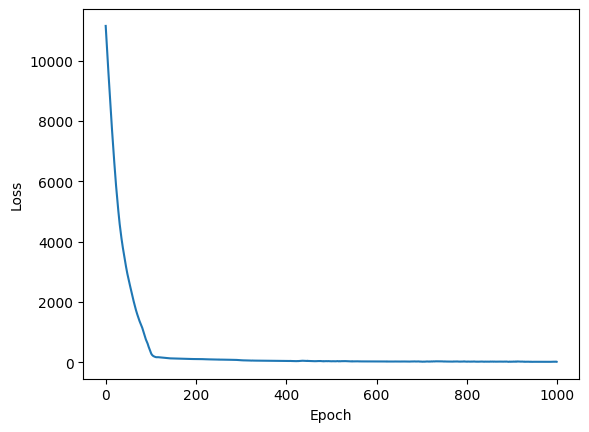

In [214]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()